# Forward Simulation

https://pdfs.semanticscholar.org/81a5/deef3eb10b5877270f4ae0a3116906c3b183.pdf

Use a bouncing ball to develop forward simulation theory.

In [1]:
# import libraries
import sympy as sym
import numpy as np

sym.init_printing()
from IPython.display import display #for pretty printing

# DERIVE EOMS OF BOARD --------------------------------------------------------------------------------------------------------

# create symbolic variables
# system parameters
g = sym.symbols('g')
mb = sym.symbols('m_{ball}') # mass

# generalized coordinates
y = sym.symbols('y') 
dy = sym.symbols('\dot{y}') 
ddy = sym.symbols('\ddot{y}') 

# forces
GRF = sym.symbols('GRF_{impact}') # impulsive impact force

EOMy = mb*ddy + mb*g - GRF
EOMy = EOMy.simplify()
    
EOMs = sym.Matrix([EOMy])
    
display(sym.solve(EOMs,ddy))

In [81]:
#initial conditions

h = 0.01

#parameters
X0val = 0.0
Y0val = 0.1
dy0 = 0.0
mval = 10.0
GRFval = 0.0

parameter_values = [(g,9.81),(mb,mval)]

yar = [Y0val]
dyar = [dy0]
GRFar = []

N = 100
for i in range(1,N):
    # contact modelling
#     # METHOD 1
#     K = 2.5e4
#     C = 5.0e2
#     d = yar[i-1] - 0
#     if d<0 and dyar[i-1]<-K/C*d:
#         GRFval = -K*d - C*d
#     else: 
#         GRFval = 0.0
        
    # METHOD 2
    K = 1e4
    C = 5e5
    l0 = 0.002
    d = 0 - yar[i-1]
    ddot = - dyar[i-1]
    
    temp = -K/C*np.tan(np.pi*d/2/l0)/d
    
    if d > 0 and ddot > temp:
        GRFval = K*np.tan(np.pi*d/2/l0) + C*d*(ddot)
    else: 
        GRFval = 0.0
    
    GRFar.append(float(GRFval))
    
    # substitute parameter values and previous conditions into the EOM 
    past = [(y,yar[i-1]),(dy,dyar[i-1]),(GRF,GRFval)]
    EOM_sub = EOMs.subs(parameter_values).subs(past)
    
    # solve for the acceleration
    acc = sym.solve(EOM_sub,[ddy])
    
    # integrate for the next velocity and position    
    dyar.append(float(dyar[i-1]+h*acc[ddy]))
    yar.append(float(yar[i]+h*dyar[i]))



IndexError: list index out of range

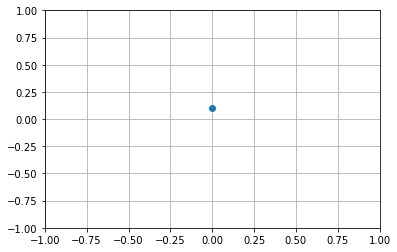

In [76]:
#animate it
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
%matplotlib inline

fig1, ax1 = plt.subplots(1,1) #create axes

def plot_ball(i,y_in,ax): #update function for animation
    ax.clear()
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
    ax.grid()
    
    #plot ball
    ballx = 0
    bally = y_in[i]
    ax.plot(ballx, bally, marker='o')
    
update = lambda i: plot_ball(i,yar,ax1) #lambdify update function

animate = ani.FuncAnimation(fig1,update,range(N),interval = 50,repeat=True)

HTML(animate.to_html5_video()) #you need to convert the animation to HTML5 to embed it in the notebook

In [80]:
# GRFar
d